# Case Itaú Unibanco - Estágio em Crédito PF Dados

No ano de 2000, no coração do mundo mágico, o Gringotts, o tradicional banco dos bruxos,
se especializou no financiamento de itens mágicos. Com o passar dos anos, o Gringotts se
tornou líder de mercado, oferecendo financiamento de varinhas e vassouras mágicas para
bruxos e bruxas de todas as casas e origens (mesmo para aqueles que são nascidos
“trouxas”). As políticas expansionistas do Ministério da Magia permitiram a ascensão social
de muitos bruxos, o que, alinhado com a estratégia de crédito do Gringotts, impulsionou o
crescimento dos negócios do banco.
Entretanto, no último ano, o governo bruxo foi atingido por uma grave crise financeira:

• O desemprego entre os bruxos chegou a alarmantes 12%;

• 60% das famílias mágicas enfrentaram dificuldades para honrar suas dívidas;

• O endividamento do Ministério da Magia atingiu 70% do PIB (Produto Interno Bruxo).

• A inadimplência no financiamento de itens mágicos está nos maiores patamares.

Esse cenário levou o Gringotts a repensar sua estratégia de concessão de crédito.

Considerando o cenário descrito acima e o arquivo disponibilizado com dados do histórico
de financiamento do banco, pedimos análises que nos ajudem a definir a melhor estratégia
de crédito para o banco Gringotts.

# Importando as principais bibliotexas para realizar o projeto

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Para esse Case irei utilizar a bilioteca "sqlite3", assim irei integrar o SQL ao python, o que facilita para desenvolver o raciocínio de códigos e gráficos.

In [43]:
import sqlite3

# EDA (Análise Exploratória de Dados)

## Análises dos Dados

In [44]:
df = pd.read_csv('Base_dados.csv', encoding='latin-1', sep=';')
df

Número do Contrato  Ano do Contrato Casa do Bruxo Histórico de Crédito  \
0                       1             1981    Grifinoria      04) Médio Risco   
1                       4             1981    Grifinoria      04) Médio Risco   
2                      14             1981    Grifinoria    01) Sem Histórico   
3                      27             1981      Corvinal       03) Alto Risco   
4                      33             1981    Grifinoria      05) Baixo Risco   
...                   ...              ...           ...                  ...   
64882               64463             2000      Corvinal    01) Sem Histórico   
64883               64639             2000     Lufa Lufa      04) Médio Risco   
64884               64677             2000    Grifinoria      05) Baixo Risco   
64885               64732             2000     Lufa Lufa       03) Alto Risco   
64886               64770             2000     Lufa Lufa      05) Baixo Risco   

                Patrimônio do Cliente Ocupação do Bruxo     Risco do bruxo  \
0             Sem Bens Significativos  Bruxos Regulares      04) Cauteloso   
1      Colecionador Artefatos Mágicos  Bruxos Regulares        03) Crítico   
2             Sem Bens Significativos  Bruxos Regulares      04) Cauteloso   
3             Sem Bens Significativos  Bruxos Regulares        03) Crítico   
4      Colecionador Artefatos Mágicos  Bruxos Regulares      04) Cauteloso   
...                               ...               ...                ...   
64882  Colecionador Artefatos Mágicos  Bruxos Regulares        03) Crítico   
64883         Sem Bens Significativos  Bruxos Regulares        03) Crítico   
64884         Sem Bens Significativos  Bruxos Regulares      04) Cauteloso   
64885         Sem Bens Significativos  Bruxos Regulares  02) Muito Crítico   
64886         Sem Bens Significativos  Bruxos Regulares         05) Seguro   

      Poder Aquisitivo do Bruxo Origem da Venda Local da Venda  \
0                     Nuqueiros        Gringots  Beco Diagonal   
1                   Galeonários        Gringots  Beco Diagonal   
2        Mofadores de Monstrons        Gringots  Beco Diagonal   
3                     Nuqueiros        Gringots  Beco Diagonal   
4        Mofadores de Monstrons        Gringots  Beco Diagonal   
...                         ...             ...            ...   
64882               Galeonários      Ambulantes      Hogsmeade   
64883    Mofadores de Monstrons      Ambulantes      Hogsmeade   
64884    Mofadores de Monstrons      Ambulantes      Hogsmeade   
64885                 Nuqueiros      Ambulantes      Hogsmeade   
64886             Aristomágicos      Ambulantes  Beco Diagonal   

      Tipo de Produto  Idade do Bruxo Valor da Renda do Bruxo  \
0             Varinha              83                $26.271    
1           Vassouras              45               $113.550    
2             Varinha              51                $14.607    
3             Varinha              63                $33.941    
4             Varinha              72                $18.034    
...               ...             ...                     ...   
64882         Varinha              65                $78.713    
64883         Varinha              48                 $9.896    
64884         Varinha              54                $12.431    
64885         Varinha              59                $19.323    
64886         Varinha              85                $69.046    

      Valor da Parcela Contratado Valor do Financiamento  \
0                        $16.175               $251.124    
1                        $19.882               $749.925    
2                         $4.041               $300.000    
3                         $1.467                $92.250    
4                        $10.843               $396.930    
...                           ...                    ...   
64882                    $12.651               $381.713    
64883                    $13.162           

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64887 entries, 0 to 64886
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Número do Contrato                 64887 non-null  int64 
 1   Ano do Contrato                    64887 non-null  int64 
 2   Casa do Bruxo                      64887 non-null  object
 3   Histórico de Crédito               64887 non-null  object
 4   Patrimônio do Cliente              64887 non-null  object
 5   Ocupação do Bruxo                  64887 non-null  object
 6   Risco do bruxo                     64887 non-null  object
 7   Poder Aquisitivo do Bruxo          64887 non-null  object
 8   Origem da Venda                    64887 non-null  object
 9   Local da Venda                     64887 non-null  object
 10  Tipo de Produto                    64887 non-null  object
 11  Idade do Bruxo                     64887 non-null  int64 
 12  Valo

Aqui é possível notar que ao importar a base de dados as colunas de valores numéricos (renda, Financiamento e Parcela) se tornaram em STRING.

As três células de código a seguir corrigem esse pequeno problema:

In [46]:
df['Valor da Renda do Bruxo'] = (
    df['Valor da Renda do Bruxo']

    .str.replace('$', '', regex=False)

    .str.replace('.', '', regex=False)

    .astype(float)
)

print(df[['Valor da Renda do Bruxo']].head())
print(f"Novo tipo de dado da coluna: {df['Valor da Renda do Bruxo'].dtype}")

   Valor da Renda do Bruxo
0                  26271.0
1                 113550.0
2                  14607.0
3                  33941.0
4                  18034.0
Novo tipo de dado da coluna: float64


In [47]:
df['Valor da Parcela Contratado'] = (
    df['Valor da Parcela Contratado']

    .str.replace('$', '', regex=False)

    .str.replace('.', '', regex=False)

    .astype(float)
)

print(df[['Valor da Parcela Contratado']].head())
print(f"Novo tipo de dado da coluna: {df['Valor da Parcela Contratado'].dtype}")

   Valor da Parcela Contratado
0                      16175.0
1                      19882.0
2                       4041.0
3                       1467.0
4                      10843.0
Novo tipo de dado da coluna: float64


In [48]:
df['Valor do Financiamento'] = (
    df['Valor do Financiamento']

    .str.replace('$', '', regex=False)

    .str.replace('.', '', regex=False)

    .astype(float)
)

print(df[['Valor do Financiamento']].head())
print(f"Novo tipo de dado da coluna: {df['Valor do Financiamento'].dtype}")

   Valor do Financiamento
0                251124.0
1                749925.0
2                300000.0
3                 92250.0
4                396930.0
Novo tipo de dado da coluna: float64


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64887 entries, 0 to 64886
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Número do Contrato                 64887 non-null  int64  
 1   Ano do Contrato                    64887 non-null  int64  
 2   Casa do Bruxo                      64887 non-null  object 
 3   Histórico de Crédito               64887 non-null  object 
 4   Patrimônio do Cliente              64887 non-null  object 
 5   Ocupação do Bruxo                  64887 non-null  object 
 6   Risco do bruxo                     64887 non-null  object 
 7   Poder Aquisitivo do Bruxo          64887 non-null  object 
 8   Origem da Venda                    64887 non-null  object 
 9   Local da Venda                     64887 non-null  object 
 10  Tipo de Produto                    64887 non-null  object 
 11  Idade do Bruxo                     64887 non-null  int

**PRONTO!**

In [50]:
df.head()

Número do Contrato  Ano do Contrato Casa do Bruxo Histórico de Crédito  \
0                   1             1981    Grifinoria      04) Médio Risco   
1                   4             1981    Grifinoria      04) Médio Risco   
2                  14             1981    Grifinoria    01) Sem Histórico   
3                  27             1981      Corvinal       03) Alto Risco   
4                  33             1981    Grifinoria      05) Baixo Risco   

            Patrimônio do Cliente Ocupação do Bruxo Risco do bruxo  \
0         Sem Bens Significativos  Bruxos Regulares  04) Cauteloso   
1  Colecionador Artefatos Mágicos  Bruxos Regulares    03) Crítico   
2         Sem Bens Significativos  Bruxos Regulares  04) Cauteloso   
3         Sem Bens Significativos  Bruxos Regulares    03) Crítico   
4  Colecionador Artefatos Mágicos  Bruxos Regulares  04) Cauteloso   

  Poder Aquisitivo do Bruxo Origem da Venda Local da Venda Tipo de Produto  \
0                 Nuqueiros        Gringots  Beco Diagonal         Varinha   
1               Galeonários        Gringots  Beco Diagonal       Vassouras   
2    Mofadores de Monstrons        Gringots  Beco Diagonal         Varinha   
3                 Nuqueiros        Gringots  Beco Diagonal         Varinha   
4    Mofadores de Monstrons        Gringots  Beco Diagonal         Varinha   

   Idade do Bruxo  Valor da Renda do Bruxo  Valor da Parcela Contratado  \
0              83                  26271.0                      16175.0   
1              45                 113550.0                      19882.0   
2              51                  14607.0                       4041.0   
3              63                  33941.0                       1467.0   
4              72                  18034.0                      10843.0   

   Valor do Financiamento  Marcação de Cliente Inadimplentes  \
0                251124.0                                  0   
1                749925.0                                  0   
2                300000.0                                  0   
3                 92250.0                                  0   
4                396930.0                                  0   

   Quantidade de Contratos  
0                        1  
1                        1  
2                        1  
3                        1  
4                        1

A célula de código abaixo está conectando nossa base de dados ao SQL.

In [51]:
conn = sqlite3.connect('my_database.db')

df.to_sql('table_case', conn, if_exists='replace', index=False)

print(f"DataFrame salvo como tabela 'table_case' no banco de dados 'my_database.db' com sucesso!")

DataFrame salvo como tabela 'table_case' no banco de dados 'my_database.db' com sucesso!


1ª Query, aqui estou vendo qual a proporção entre clientes Adimplentes e Inadimplentes em todo o histórico da base.

Aqui podemos ver que proporcionalmente existem pouquíssimos clientes inadimplentes (cerca de 6,9%).

In [52]:
sql_query = """
SELECT
  distinct "Marcação de Cliente Inadimplentes" as Marcação,
  count("Marcação de Cliente Inadimplentes") as Contagem
FROM table_case
  GROUP BY "Marcação de Cliente Inadimplentes"
"""
df_ = pd.read_sql_query(sql_query, conn)
df_

Marcação  Contagem
0         0     60382
1         1      4505

In [53]:
fig = px.bar(
    df_,
    x='Marcação',
    y='Contagem',
    title='Distribuição de Clientes por Status de Inadimplência, em Todo o Histórico da Base de Dados',
    labels={
        'Marcação': 'Status de Inadimplência (0=Adimplente, 1=Inadimplente)',
        'Contagem': 'Contagem de Clientes'
    },
    color='Marcação',
    color_discrete_map={0: 'rgba(66, 133, 244, 0.8)', 1: 'rgba(234, 67, 53, 0.8)'}
)

fig.update_xaxes(type='category')

fig.show()

2ª Query, aqui estou vendo qual a proporção entre Valor Financiado de Adimplentes e Inadimplentes em todo o histórico da base.

Ao olharmos esse gráfico, é notável que a proporção de valor inadimplente é bem menor em relação ao adimplente, PORÉM, são no total 2 BILHÕES em galeões, o que é um valor MUITO grande se formos levar para a realidade.

In [54]:
sql_query = """
Select
  distinct "Marcação de Cliente Inadimplentes" as Marcação,
  sum("Valor do Financiamento") as Valor_Financiamento_Total
FROM table_case
  GROUP BY "Marcação de Cliente Inadimplentes"
"""
df_ = pd.read_sql_query(sql_query, conn)
df_

Marcação  Valor_Financiamento_Total
0         0               3.154537e+10
1         1               2.131567e+09

In [55]:
fig = px.bar(
    df_,
    x='Marcação',
    y='Valor_Financiamento_Total',
    title='Valor total de Financiamento por Status de Inadimplência, em Todo o Histórico da Base de Dados',
    labels={
        'Marcação': 'Status de Inadimplência (0=Adimplente, 1=Inadimplente)',
        'Valor_Financiamento_Total': 'Valor do Financiamento Total'
    },
    color='Marcação',
    color_discrete_map={0: 'rgba(66, 133, 244, 0.8)', 1: 'rgba(234, 67, 53, 0.8)'}
)

fig.update_xaxes(type='category')

fig.show()

3ª Query, aqui estou vendo qual a proporção entre clientes Adimplentes e Inadimplentes SOMENTE no ano 2000 (ano mais recente).

Novamente podemos notar que a porcentagem de clientes inadimplentes é bem baixa em relação ao total, porém é perceptível um aumento nos anos 2000 em relação a todo o histórico da base (9,47%).

In [56]:
sql_query = """
SELECT
  distinct "Marcação de Cliente Inadimplentes" as Marcação,
  count("Marcação de Cliente Inadimplentes") as Contagem
FROM table_case
where "Ano do Contrato" = 2000
  GROUP BY "Marcação de Cliente Inadimplentes"
"""
df_ = pd.read_sql_query(sql_query, conn)
df_

Marcação  Contagem
0         0      2198
1         1       230

In [57]:
fig = px.bar(
    df_,
    x='Marcação',
    y='Contagem',
    title='Distribuição de Clientes por Status de Inadimplência, no Ano 2000',
    labels={
        'Marcação': 'Status de Inadimplência (0=Adimplente, 1=Inadimplente)',
        'Contagem': 'Contagem de Clientes'
    },
    color='Marcação',
    color_discrete_map={0: 'rgba(66, 133, 244, 0.8)', 1: 'rgba(234, 67, 53, 0.8)'}
)

fig.update_xaxes(type='category')

fig.show()

4ª Query, aqui estou vendo qual a proporção entre Valor Financiado de Adimplentes e Inadimplentes SOMENTE no ano 2000 (ano mais recente).

Novamente, podemos notar que a proporção do valor de financiamento inadimplente é baixa em relação aos adimplentes, PORÉM, são 100M de galeões, o que é um grande valor.

In [58]:
sql_query = """
Select
  distinct "Marcação de Cliente Inadimplentes" as Marcação,
  sum("Valor do Financiamento") as Valor_Financiamento_Total
FROM table_case
where "Ano do Contrato" = 2000
  GROUP BY "Marcação de Cliente Inadimplentes"
"""
df_ = pd.read_sql_query(sql_query, conn)
df_

Marcação  Valor_Financiamento_Total
0         0               1.154843e+09
1         1               1.033910e+08

In [59]:
fig = px.bar(
    df_,
    x='Marcação',
    y='Valor_Financiamento_Total',
    title='Distribuição de Clientes por Status de Inadimplência, no Ano 2000',
    labels={
        'Marcação': 'Status de Inadimplência (0=Adimplente, 1=Inadimplente)',
        'Valor_Financiamento_Total': 'Valor do Financiamento Total'
    },
    color='Marcação',
    color_discrete_map={0: 'rgba(66, 133, 244, 0.8)', 1: 'rgba(234, 67, 53, 0.8)'}
)

fig.update_xaxes(type='category')

fig.show()

5ª Análise, aqui montei um BOXPLOT com a renda por ocupação do bruxo.

Essa visualização é de extrema importância para identificar outliers, é notável que existe um outlier MUITO EXTREMO em relação aos demais.

In [60]:
fig = px.box(
    df,
    x='Ocupação do Bruxo',
    y='Valor da Renda do Bruxo',
    title='Distribuição de Renda por Ocupação do Bruxo',
    labels={
        'Ocupação do Bruxo': 'Ocupação',
        'Valor da Renda do Bruxo': 'Valor da Renda ($)'
    },

    color='Ocupação do Bruxo'
)


fig.update_layout(
    xaxis_title_text='Ocupação do Bruxo',
    yaxis_title_text='Valor da Renda ($)',

    xaxis={'tickangle': 45}
)


fig.show()

6ª Query, realizei somente uma pequena consulta para poder visualizar melhor todas as características do bruxo outlier.

In [61]:
sql_query = """
SELECT
  *
FROM table_case
where "Valor da Renda do Bruxo" = (Select max("Valor da Renda do Bruxo") from table_case)
"""
df_ = pd.read_sql_query(sql_query, conn)
df_

Número do Contrato  Ano do Contrato Casa do Bruxo Histórico de Crédito  \
0               19923             1981     Lufa Lufa       03) Alto Risco   

       Patrimônio do Cliente                    Ocupação do Bruxo  \
0  Possui Reliquias da Morte  Funcionarios do Ministerio da Magia   

  Risco do bruxo Poder Aquisitivo do Bruxo Origem da Venda Local da Venda  \
0     05) Seguro               Galeonários        Gringots  Beco Diagonal   

  Tipo de Produto  Idade do Bruxo  Valor da Renda do Bruxo  \
0         Varinha              58                3686617.0   

   Valor da Parcela Contratado  Valor do Financiamento  \
0                       5577.0                374925.0   

   Marcação de Cliente Inadimplentes  Quantidade de Contratos  
0                                  0                        1

7ª Análise, novamente montei um BOXPLOT mas dessa vez com a distribuição de Renda por Poder Aquisitivo do Bruxo.

Essa visualização é interessante pois podemos notar que, a classificação de poder aquisitivo está muito mais correlacionada com o valor de renda do que a ocupação do bruxo.

In [62]:
fig = px.box(
    df,
    x='Poder Aquisitivo do Bruxo',
    y='Valor da Renda do Bruxo',
    title='Distribuição de Renda por Poder Aquisitivo do Bruxo',
    labels={
        'Poder Aquisitivo do Bruxo': 'Poder Aquisitivo',
        'Valor da Renda do Bruxo': 'Valor da Renda ($)'
    },

    color='Poder Aquisitivo do Bruxo'
)


fig.update_layout(
    xaxis_title_text='Poder Aquisitivo do Bruxo',
    yaxis_title_text='Valor da Renda ($)',
    xaxis={'tickangle': 45}
)

fig.show()

8ª Query, analisando se existe alguma correlação entre inadimplência e a casa qual o bruxo pertence.

In [63]:
sql_query = """
SELECT
  distinct "Casa do Bruxo" as Casa,
  count("Casa do Bruxo") as Contagem
FROM table_case
where "Marcação de Cliente Inadimplentes" = 1
  GROUP BY "Casa do Bruxo"
"""
df_ = pd.read_sql_query(sql_query, conn)
df_

Casa  Contagem
0    Corvinal      1107
1  Grifinoria      1150
2   Lufa Lufa      1096
3   Sonserina      1152

9ª Query, visualizando se existia alguma casa onde o Valor de Financiamento dos Inadimplentes era muito maior que as demais casas.

In [64]:
sql_query = """
SELECT
  distinct "Casa do Bruxo" as Casa,
  sum("Valor do Financiamento") as Valor_Financiamento_Total
FROM table_case
where "Marcação de Cliente Inadimplentes" = 1
  GROUP BY "Casa do Bruxo"
"""
df_ = pd.read_sql_query(sql_query, conn)
df_

Casa  Valor_Financiamento_Total
0    Corvinal                540053618.0
1  Grifinoria                515818509.0
2   Lufa Lufa                533852753.0
3   Sonserina                541842184.0

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64887 entries, 0 to 64886
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Número do Contrato                 64887 non-null  int64  
 1   Ano do Contrato                    64887 non-null  int64  
 2   Casa do Bruxo                      64887 non-null  object 
 3   Histórico de Crédito               64887 non-null  object 
 4   Patrimônio do Cliente              64887 non-null  object 
 5   Ocupação do Bruxo                  64887 non-null  object 
 6   Risco do bruxo                     64887 non-null  object 
 7   Poder Aquisitivo do Bruxo          64887 non-null  object 
 8   Origem da Venda                    64887 non-null  object 
 9   Local da Venda                     64887 non-null  object 
 10  Tipo de Produto                    64887 non-null  object 
 11  Idade do Bruxo                     64887 non-null  int

10ª Análise, aqui podemos analisar a porcentagem de clientes inadimplentes em diferentes variáveis categóricas, essa visão apresenta o histórico completo da base de dados.

In [66]:
data1_x = ['Casa do Bruxo', 'Histórico de Crédito', 'Patrimônio do Cliente', 'Ocupação do Bruxo', 'Risco do bruxo', 'Poder Aquisitivo do Bruxo', 'Origem da Venda', 'Local da Venda', 'Tipo de Produto']
Target = ['Marcação de Cliente Inadimplentes']


for x in data1_x:
    if df[x].dtype != 'float64':
        print(f'Taxa de Inadimplência para contratos de 2000 - Categoria: {x}')
        print(df[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-' * 10, '\n')

Taxa de Inadimplência para contratos de 2000 - Categoria: Casa do Bruxo
  Casa do Bruxo  Marcação de Cliente Inadimplentes
0      Corvinal                           0.068245
1    Grifinoria                           0.070891
2     Lufa Lufa                           0.067563
3     Sonserina                           0.071015
---------- 

Taxa de Inadimplência para contratos de 2000 - Categoria: Histórico de Crédito
  Histórico de Crédito  Marcação de Cliente Inadimplentes
0    01) Sem Histórico                           0.090093
1   02) Atraso Recente                           0.155287
2       03) Alto Risco                           0.084465
3      04) Médio Risco                           0.050691
4      05) Baixo Risco                           0.021370
---------- 

Taxa de Inadimplência para contratos de 2000 - Categoria: Patrimônio do Cliente
            Patrimônio do Cliente  Marcação de Cliente Inadimplentes
0  Colecionador Artefatos Mágicos                           0.035263
1 

11ª Análise, aqui podemos analisar a porcentagem de clientes inadimplentes em diferentes variáveis categóricas, essa visão apresenta apenas o ano 200 da base de dados.

In [67]:
df_2000 = df[df['Ano do Contrato'] == 2000].copy()

data1_x = ['Casa do Bruxo', 'Histórico de Crédito', 'Patrimônio do Cliente', 'Ocupação do Bruxo', 'Risco do bruxo',
           'Poder Aquisitivo do Bruxo', 'Origem da Venda', 'Local da Venda', 'Tipo de Produto']
Target = ['Marcação de Cliente Inadimplentes']

for x in data1_x:
    if df_2000[x].dtype != 'float64':
        print(f'Taxa de Inadimplência para contratos de 2000 - Categoria: {x}')

        resultado_grupo = df_2000[[x, Target[0]]].groupby(x, as_index=False).mean()

        resultado_grupo.rename(columns={Target[0]: 'Taxa_Inadimplência'}, inplace=True)

        print(resultado_grupo)
        print('-' * 40, '\n')

Taxa de Inadimplência para contratos de 2000 - Categoria: Casa do Bruxo
  Casa do Bruxo  Taxa_Inadimplência
0      Corvinal            0.102521
1    Grifinoria            0.080402
2     Lufa Lufa            0.098284
3     Sonserina            0.097479
---------------------------------------- 

Taxa de Inadimplência para contratos de 2000 - Categoria: Histórico de Crédito
  Histórico de Crédito  Taxa_Inadimplência
0    01) Sem Histórico            0.083969
1   02) Atraso Recente            0.201739
2       03) Alto Risco            0.087571
3      04) Médio Risco            0.073333
4      05) Baixo Risco            0.035578
---------------------------------------- 

Taxa de Inadimplência para contratos de 2000 - Categoria: Patrimônio do Cliente
            Patrimônio do Cliente  Taxa_Inadimplência
0  Colecionador Artefatos Mágicos            0.027523
1       Possui Reliquias da Morte            0.078431
2         Sem Bens Significativos            0.103063
-----------------------------

## Pré-processamento da base de dados
Nessa parte irei tratar a base de dados para que seja possível treinar modelos de Machine Learning que possam predizer clientes inadimplentes ou não.

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64887 entries, 0 to 64886
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Número do Contrato                 64887 non-null  int64  
 1   Ano do Contrato                    64887 non-null  int64  
 2   Casa do Bruxo                      64887 non-null  object 
 3   Histórico de Crédito               64887 non-null  object 
 4   Patrimônio do Cliente              64887 non-null  object 
 5   Ocupação do Bruxo                  64887 non-null  object 
 6   Risco do bruxo                     64887 non-null  object 
 7   Poder Aquisitivo do Bruxo          64887 non-null  object 
 8   Origem da Venda                    64887 non-null  object 
 9   Local da Venda                     64887 non-null  object 
 10  Tipo de Produto                    64887 non-null  object 
 11  Idade do Bruxo                     64887 non-null  int

Dropando algumas colunas que não fazem muito sentido serem levadas.

In [69]:
df.drop(columns=['Número do Contrato', 'Ano do Contrato', 'Idade do Bruxo', 'Quantidade de Contratos'], inplace=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64887 entries, 0 to 64886
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Casa do Bruxo                      64887 non-null  object 
 1   Histórico de Crédito               64887 non-null  object 
 2   Patrimônio do Cliente              64887 non-null  object 
 3   Ocupação do Bruxo                  64887 non-null  object 
 4   Risco do bruxo                     64887 non-null  object 
 5   Poder Aquisitivo do Bruxo          64887 non-null  object 
 6   Origem da Venda                    64887 non-null  object 
 7   Local da Venda                     64887 non-null  object 
 8   Tipo de Produto                    64887 non-null  object 
 9   Valor da Renda do Bruxo            64887 non-null  float64
 10  Valor da Parcela Contratado        64887 non-null  float64
 11  Valor do Financiamento             64887 non-null  flo

In [71]:
from sklearn.preprocessing import LabelEncoder

le_casa = LabelEncoder()
df['Casa do Bruxo'] = le_casa.fit_transform(df['Casa do Bruxo'])

le_hist = LabelEncoder()
df['Histórico de Crédito'] = le_hist.fit_transform(df['Histórico de Crédito'])

le_patr = LabelEncoder()
df['Patrimônio do Cliente'] = le_patr.fit_transform(df['Patrimônio do Cliente'])

le_ocu = LabelEncoder()
df['Ocupação do Bruxo'] = le_ocu.fit_transform(df['Ocupação do Bruxo'])

le_risk = LabelEncoder()
df['Risco do bruxo'] = le_risk.fit_transform(df['Risco do bruxo'])

le_poder = LabelEncoder()
df['Poder Aquisitivo do Bruxo'] = le_poder.fit_transform(df['Poder Aquisitivo do Bruxo'])

le_orig = LabelEncoder()
df['Origem da Venda'] = le_orig.fit_transform(df['Origem da Venda'])

le_loc = LabelEncoder()
df['Local da Venda'] = le_loc.fit_transform(df['Local da Venda'])

le_tip = LabelEncoder()
df['Tipo de Produto'] = le_tip.fit_transform(df['Tipo de Produto'])

In [72]:
x = df.iloc[:, 0:12].values

y = df.iloc[:, 12].values

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Encontrando os melhores parâmetros para nossos modelos de machine learning (Tunning)

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [75]:
best_params = {}

Árvore de Decisão

In [76]:
parametros_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3, 5],
    'max_depth': [None, 5, 10]
}


grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros_dt)
grid_search.fit(x, y)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
best_params['DT'] = grid_search.best_params_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'best'}
0.9294773736570313


Random Forest

In [78]:
parametros_rf = {
    'n_estimators': [100],
    'criterion': ['gini'],
    'max_depth': [None],
    'class_weight': ['balanced'],
    'min_samples_split': [2],
    'random_state': [42]
}




grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros_rf)
grid_search.fit(x, y)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
best_params['RF'] = grid_search.best_params_
print(melhores_parametros)
print(melhor_resultado)

{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}
0.9286913985224139


KNN

In [79]:
parametros_knn = {
    'n_neighbors': [5],
    'weights': ['uniform'],
    'algorithm': ['auto'],
    'leaf_size': [10],
    'p': [1]
}

grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros_knn)
grid_search.fit(x, y)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
best_params['KNN'] = grid_search.best_params_
print(melhores_parametros)
print(melhor_resultado)

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.9237904756822095


Regressão Logística

In [80]:
parametros_lr = [
    {
        'penalty': ['l2'],
        'solver': ['lbfgs', 'liblinear'],
        'C': [0.01, 0.1, 1.0],
        'max_iter': [500],
        'random_state': [42]
    },

    {
        'penalty': ['l1'],
        'solver': ['liblinear', 'saga'],
        'C': [0.01, 0.1, 1.0],
        'max_iter': [500],
        'random_state': [42]
    },

    {
        'penalty': ['elasticnet'],
        'solver': ['saga'],
        'C': [0.1, 1.0],
        'l1_ratio': [0.0, 0.5, 1.0],
        'max_iter': [500],
        'random_state': [42]
    }
]

grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros_lr)
grid_search.fit(x, y)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
best_params['LR'] = grid_search.best_params_
print(melhores_parametros)
print(melhor_resultado)

{'C': 0.01, 'max_iter': 500, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs'}
0.9302942046203274


In [81]:
print(best_params)

{'DT': {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'best'}, 'RF': {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}, 'KNN': {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}, 'LR': {'C': 0.01, 'max_iter': 500, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs'}}


In [82]:
model_classes = {
    'DT': DecisionTreeClassifier,
    'RF': RandomForestClassifier,
    'KNN': KNeighborsClassifier,
    'LR': LogisticRegression
}

# Função que inicializa os modelos com os melhores parâmetros
def create_models(best_params, model_classes):
    models = {}
    for name, cls in model_classes.items():
        params = best_params.get(name, {})  # usa {} se não tiver params
        models[name] = cls(**params)
    return models

# Criando os modelos
modelos_otimizados = create_models(best_params, model_classes)

#Validação Cruzada dos Modelos

In [83]:
from sklearn.model_selection import cross_val_score, KFold

In [85]:
resultados_DT = []
resultados_RF = []
resultados_KNN = []
resultados_LR = []

for i in range(5):
  print(f"Repetição {i+1}")
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  DT = modelos_otimizados['DT']
  scores = cross_val_score(DT, x, y, cv = kfold)
  resultados_DT.append(scores.mean())

  RF = modelos_otimizados['RF']
  scores = cross_val_score(RF, x, y, cv = kfold)
  resultados_RF.append(scores.mean())

  KNN = modelos_otimizados['KNN']
  scores = cross_val_score(KNN, x, y, cv = kfold)
  resultados_KNN.append(scores.mean())

  LR = modelos_otimizados['LR']
  scores = cross_val_score(LR, x, y, cv = kfold)
  resultados_LR.append(scores.mean())

Repetição 1
Repetição 2
Repetição 3
Repetição 4
Repetição 5


In [86]:
resultados = pd.DataFrame({'Árvore de Decisão': resultados_DT, 'Random forest': resultados_RF,
                           'KNN': resultados_KNN, 'Regressão Linear': resultados_LR})
resultados.describe()

Árvore de Decisão  Random forest       KNN  Regressão Linear
count           5.000000       5.000000  5.000000          5.000000
mean            0.931915       0.944855  0.931410          0.930260
std             0.000183       0.000424  0.000286          0.000007
min             0.931743       0.944288  0.931019          0.930248
25%             0.931835       0.944596  0.931219          0.930263
50%             0.931851       0.944889  0.931527          0.930263
75%             0.931928       0.945166  0.931558          0.930263
max             0.932221       0.945336  0.931727          0.930263

In [87]:
resultados.var()

Árvore de Decisão    3.340985e-08
Random forest        1.795104e-07
KNN                  8.154821e-08
Regressão Linear     4.788788e-11
dtype: float64

In [88]:
(resultados.std() / resultados.mean()) * 100

Árvore de Decisão    0.019614
Random forest        0.044841
KNN                  0.030660
Regressão Linear     0.000744
dtype: float64

Aqui foi possível notar que todos os modelos tiveram uma alta acurácia, principalmente Random Forest. Mas nesse caso não irei avaliar a acurácia do modelo mas sim sua precisão, visto que o objetivo é reduzir o prejuízo perdido por inadimplência, será necessário avaliar seu RECALL.

# Realizando outras análises de validação

In [89]:
from sklearn.model_selection import train_test_split

x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, average_precision_score, roc_curve, roc_auc_score
from yellowbrick.classifier import ConfusionMatrix

In [91]:
DT = modelos_otimizados['DT']
RF = modelos_otimizados['RF']
KNN = modelos_otimizados['KNN']
LR = modelos_otimizados['LR']

ÁRVORE DE DECISÃO

In [92]:
DT.fit(x_treinamento, y_treinamento)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)

In [93]:
previsoes = DT.predict(x_teste)
accuracy_score(y_teste, previsoes)

0.9338552582912095

0.9338552582912095

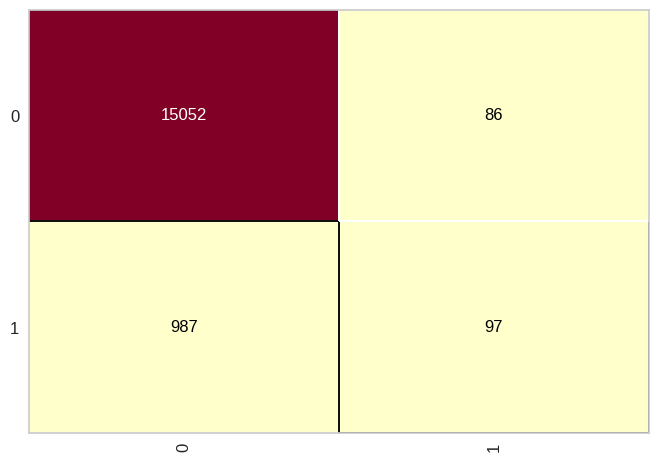

In [94]:
cm = ConfusionMatrix(DT)
cm.fit(x_treinamento, y_treinamento)
cm.score(x_teste, y_teste)

In [95]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     15138
           1       0.53      0.09      0.15      1084

    accuracy                           0.93     16222
   macro avg       0.73      0.54      0.56     16222
weighted avg       0.91      0.93      0.91     16222



RANDOM FOREST

In [96]:
RF.fit(x_treinamento, y_treinamento)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [97]:
previsoes = RF.predict(x_teste)
accuracy_score(y_teste, previsoes)

0.9441499198619159

0.9441499198619159

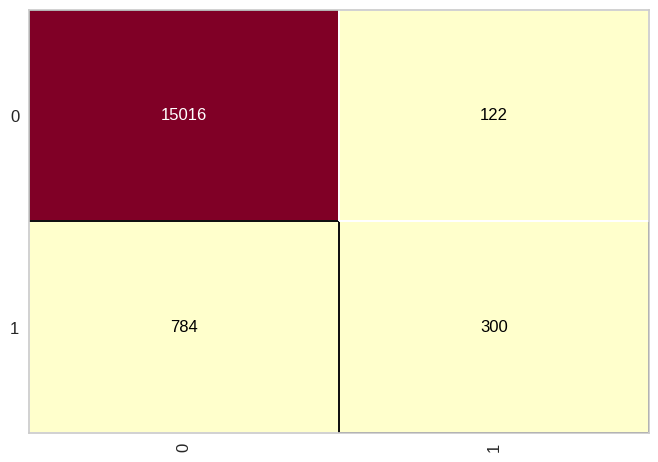

In [98]:
cm = ConfusionMatrix(RF)
cm.fit(x_treinamento, y_treinamento)
cm.score(x_teste, y_teste)

In [99]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     15138
           1       0.71      0.28      0.40      1084

    accuracy                           0.94     16222
   macro avg       0.83      0.63      0.68     16222
weighted avg       0.93      0.94      0.93     16222



KNN

In [100]:
KNN.fit(x_treinamento, y_treinamento)

KNeighborsClassifier(leaf_size=10, p=1)

In [101]:
previsoes = KNN.predict(x_teste)
accuracy_score(y_teste, previsoes)

0.9316360498089015

0.9316360498089015

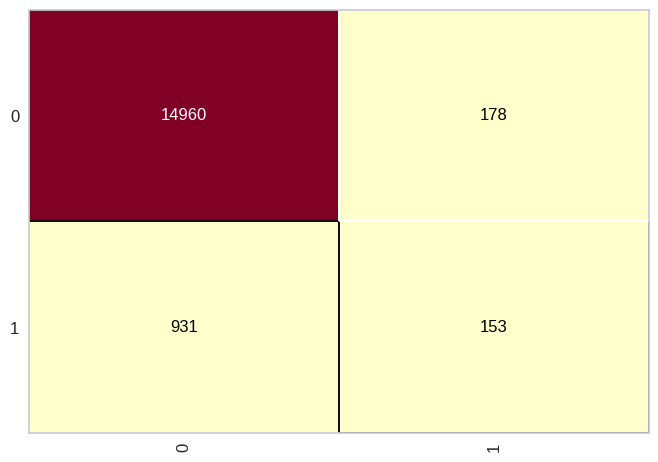

In [102]:
cm = ConfusionMatrix(KNN)
cm.fit(x_treinamento, y_treinamento)
cm.score(x_teste, y_teste)

In [103]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     15138
           1       0.46      0.14      0.22      1084

    accuracy                           0.93     16222
   macro avg       0.70      0.56      0.59     16222
weighted avg       0.91      0.93      0.91     16222



REGRESSÃO LOGÍSTICA

In [104]:
LR.fit(x_treinamento, y_treinamento)

LogisticRegression(C=0.01, max_iter=500, random_state=42)

In [105]:
previsoes = LR.predict(x_teste)
accuracy_score(y_teste, previsoes)

0.9323141412896067

0.9323141412896067

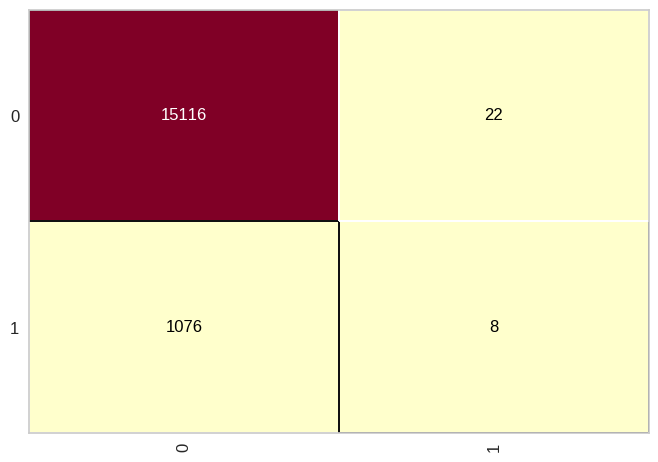

In [106]:
cm = ConfusionMatrix(LR)
cm.fit(x_treinamento, y_treinamento)
cm.score(x_teste, y_teste)

In [107]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     15138
           1       0.27      0.01      0.01      1084

    accuracy                           0.93     16222
   macro avg       0.60      0.50      0.49     16222
weighted avg       0.89      0.93      0.90     16222



#Conclusão e Recomendações Estratégicas
A análise de crédito revelou segmentos de alto risco que exigem atenção imediata e um redirecionamento estratégico da oferta de crédito.

**Segmentação de Risco e Restrição de Crédito:**

Com base nos dados históricos de inadimplência, identifiquei claramente três públicos que devem ter a concessão de crédito mais restringida. Essa restrição é necessária devido às suas taxas de inadimplência significativamente superiores à média da base.

Os grupos de maior risco são, em ordem decrescente de taxa de inadimplência: Foragidos (19,92%), Clientes com Atraso Recente (15,53%) e, notavelmente, clientes que adquiriram o produto na Travessa do Tranco (14,15%).

Ao focar na performance do ano mais recente (2000), a urgência dessa restrição se confirma, com as taxas mantendo-se elevadas: o grupo de Atraso Recente sobe para 20,17%, seguido de perto por Foragidos (19,60%) e pela Travessa do Tranco (16,29%). É recomendado a aplicação de critérios de scoring mais rígidos para esses três perfis, reduzindo a exposição do banco a quase um quinto da inadimplência nesses segmentos.

**Ofertas Diferenciadas por Local e Produto:**

A análise de associação mostrou que o Local da Venda apresenta uma correlação muito mais forte com a inadimplência do que o Tipo de Produto. Enquanto o produto em si tem pouca interferência na capacidade de pagamento, a variação da taxa de inadimplência de acordo com o local é significativa.

Portanto, a estratégia de ofertas diferenciadas deve priorizar o Local da Venda. Áreas de alto risco, como a Travessa do Tranco, devem receber ofertas com spreads de risco mais elevados ou limites de crédito menores.

**Potencial e Limitações do Modelo de Machine Learning:**

Desenvolvi um modelo preditivo baseado em Random Forest com o objetivo de reduzir a carteira de inadimplentes. O modelo demonstrou um potencial promissor, conseguindo reduzir a taxa de inadimplência de 6,94% (na base original) para apenas 4,83% nas previsões. Isso indica que a inteligência artificial pode atuar como um filtro eficaz na triagem de novos clientes.

Apesar de ter atingido uma acurácia elevada, o modelo apresentou um Recall baixo, sugerindo que ele ainda falha em capturar uma parcela significativa dos verdadeiros inadimplentes. Para alcançar um objetivo mais satisfatório e maximizar a redução de risco, é imprescindível um estudo de balanceamento da base de dados para mitigar qualquer viés e otimizar o Recall. Com ajustes, o modelo tem o potencial de se tornar uma ferramenta robusta na gestão de risco de crédito do banco.